# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [9]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from plotnine import ggplot, aes, geom_bar, labs, theme, element_text

In [7]:
pip install palmerpenguins

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [10]:
from palmerpenguins import load_penguins

In [18]:
penguins = load_penguins()
penguins = penguins.dropna()

In [20]:
X = penguins.drop("bill_depth_mm", axis = 1)
y = penguins["bill_depth_mm"]

In [21]:
ct = ColumnTransformer(
    [
      ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first"), make_column_selector(dtype_include=object)),
      ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

lr_pipeline = Pipeline(
    [("preprocessing", ct),
     ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

scores = abs(cross_val_score(lr_pipeline, X, y, cv=5, scoring='neg_mean_squared_error'))
lr_mse = scores.mean()


In [28]:
#neighbors 3
ct = ColumnTransformer(
    [
      ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first"), make_column_selector(dtype_include=object)),
      ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

knn_model1= Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsRegressor(n_neighbors=3))]
).set_output(transform="pandas")

scores = abs(cross_val_score(knn_model1, X, y, cv=5, scoring='neg_mean_squared_error'))
knn_mse = scores.mean()
knn_mse


1.2054385144982158

In [29]:

ct = ColumnTransformer(
    [
      ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first"), make_column_selector(dtype_include=object)),
      ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

knn_model1= Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsRegressor(n_neighbors=5))]
).set_output(transform="pandas")

scores = abs(cross_val_score(knn_model1, X, y, cv=5, scoring='neg_mean_squared_error'))
knn_mse2 = scores.mean()
knn_mse2


1.2562750067842603

In [30]:
# tree pipeline

ct = ColumnTransformer(
    [
      ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first"), make_column_selector(dtype_include=object)),
      ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

tree_model1= Pipeline(
    [("preprocessing", ct),
    ("decision_tree", DecisionTreeRegressor(random_state=42))]
).set_output(transform="pandas")

scores = abs(cross_val_score(tree_model1, X, y, cv=5, scoring='neg_mean_squared_error'))
tree_mse = scores.mean()
tree_mse



1.499514699231117

In [31]:
mse_df = pd.DataFrame({
    "Model": ["Linear", "KNN_3", "KNN_5", "Decision Tree"],
    "MSE": [lr_mse, knn_mse, knn_mse2, tree_mse]
})

In [35]:
import plotnine
from plotnine import *

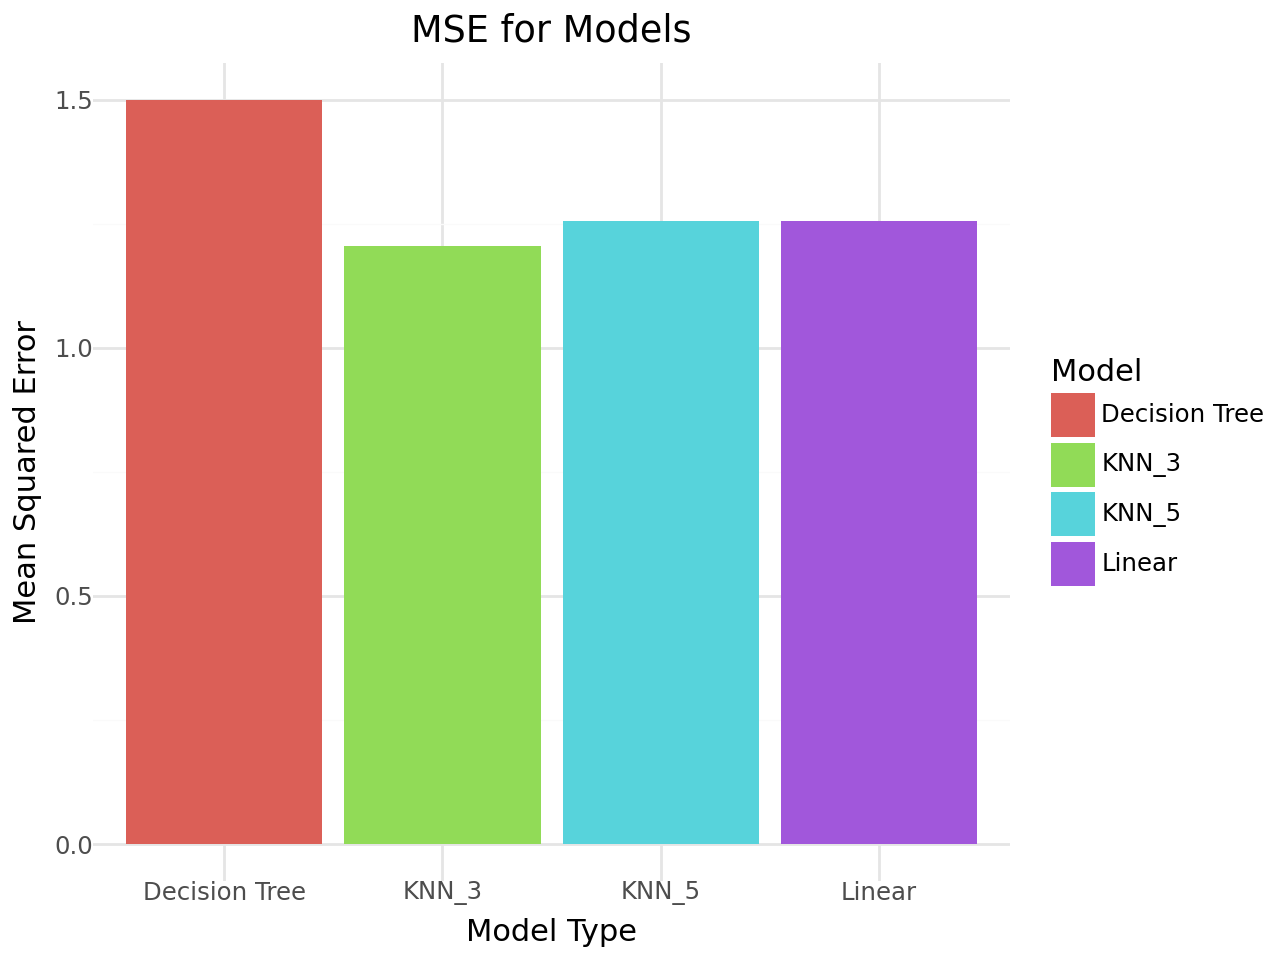

In [40]:
(ggplot(mse_df, aes(x="Model", y="MSE", fill="Model")) +
    geom_bar(stat="identity") +
    labs(title="MSE for Models",
         x="Model Type",
         y="Mean Squared Error") +
    theme(axis_text_x=element_text(rotation=45, hjust=1))
    +theme_minimal()
    #*chat helped create this plot
)